In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats
import sys
sys.path.append('/home/tomek/ib_tools')
from blotter import MongoBlotter
%matplotlib inline

In [2]:
cash = 109394
df = MongoBlotter().read()
df.tail(30)

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
933,5fb679d2bc46e17ed2d7f53f,2020-11-19 14:57:38.610,2020-11-19 13:57:38.579,MGCZ0,BUY,8.0,1860.200000,"[0000e1a7.5fb5eae9.01.01, 0000e1a7.5fb5eaea.01...",94,368684224,STOP-LOSS,3.76,-773.52
934,5fb679d2bc46e17ed2d7f540,2020-11-19 14:57:38.684,2020-11-19 13:57:38.645,GCZ0,BUY,1.0,1860.200000,[0000e1a7.5fb5eaeb.01.01],93,368684222,STOP-LOSS,2.42,-954.84
935,5fb74939bc46e17ed2d7f809,2020-11-20 05:42:33.475,2020-11-20 04:42:33.393,MNQZ0,BUY,2.0,11996.000000,"[0000e1a7.5fb70b4a.01.01, 0000e1a7.5fb70b4b.01...",210,1892085376,ENTRY,0.94,0.00
936,5fb74957bc46e17ed2d7f80a,2020-11-20 05:43:03.656,2020-11-20 04:43:03.518,NQZ0,BUY,3.0,11996.166667,"[0000e1a7.5fb70b4c.01.01, 0000e1a7.5fb70b4d.01...",209,1892085372,ENTRY,6.30,0.00
937,5fb76064bc46e17ed2d7f85b,2020-11-20 07:21:24.355,2020-11-20 06:21:24.326,NQZ0,SELL,3.0,11981.000000,[0000e1a7.5fb70ea3.01.01],212,1892085378,STOP-LOSS,6.30,-922.60
938,5fb76064bc46e17ed2d7f85c,2020-11-20 07:21:24.357,2020-11-20 06:21:24.353,MNQZ0,SELL,2.0,11980.750000,[0000e1a7.5fb70ea4.01.01],211,1892085377,STOP-LOSS,0.94,-62.88
939,5fb7b382dda6ef181c47655f,2020-11-20 13:16:02.708,2020-11-20 12:16:02.623,MNQZ0,BUY,2.0,12018.000000,"[0000e1a7.5fb72900.01.01, 0000e1a7.5fb72901.01...",92,308826871,ENTRY,0.94,0.00
940,5fb7b38adda6ef181c476560,2020-11-20 13:16:10.128,2020-11-20 12:16:10.030,NQZ0,BUY,3.0,12017.750000,"[0000e1a7.5fb72902.01.01, 0000e1a7.5fb72904.01...",91,308826868,ENTRY,6.30,0.00
941,5fb7cc02dda6ef181c4765ab,2020-11-20 15:00:34.540,2020-11-20 14:00:34.535,MNQZ0,SELL,2.0,11978.875000,"[0000e1a7.5fb7310e.01.01, 0000e1a7.5fb7310f.01...",93,308826872,STOP-LOSS,0.94,-158.38
942,5fb7cc02dda6ef181c4765ac,2020-11-20 15:00:34.737,2020-11-20 14:00:34.667,NQZ0,SELL,3.0,11976.416667,"[0000e1a7.5fb73112.01.01, 0000e1a7.5fb73113.01...",94,308826873,STOP-LOSS,6.30,-2492.60


In [3]:
df[df.reason.str.startswith('MANUAL')]

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
372,5f48024d0b06e6e56accaabb,2020-08-27 20:58:21.765,2020-08-27 18:58:21.760,NQU0,SELL,1.0,11961.75,[0000e1a7.5f47e774.01.01],-3,2141716104,MANUAL TRADE,2.1,0.0
373,5f48027e0b06e6e56accaabc,2020-08-27 20:59:10.623,2020-08-27 18:59:10.619,NQU0,BUY,1.0,11961.00,[0000e1a7.5f47e791.01.01],-4,2141716114,MANUAL TRADE,2.1,10.8
404,5f525a98f2a5ab6f74f19b3e,2020-09-04 17:17:44.300,2020-09-04 15:17:44.298,NQU0,SELL,1.0,11320.75,[0000e1a7.5f526f0b.01.01],-4,1940011984,MANUAL TRADE,2.1,0.0
432,5f7d98e9140b04161c23105c,2020-10-07 12:31:05.067,2020-10-07 10:31:05.065,NQZ0,SELL,1.0,11319.00,[0000e1a7.5f7d1bd9.01.01],-4,533904426,MANUAL TRADE,2.1,-169.2


In [4]:
df[df.realizedPNL>0].realizedPNL.count()

172

In [5]:
#del df['sys_time']
del df['exec_ids']
del df['perm_id']
del df['_id']
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df['cash'] = df.realizedPNL.cumsum() + cash
df['contract'] = df['contract'].apply(lambda x: x[:-2])
micro_contracts = df[df.contract.str.startswith('M')]
macro_contracts = df[~df.contract.str.startswith('M')]
micro_contracts['amount'] /= 10
df = pd.concat([macro_contracts, micro_contracts]).sort_index()
df.contract = df.contract.str.strip('M')
df['contract'] = df['contract'].apply(lambda x: x[:2])
df.contract = df.contract.str.strip()

In [6]:
c = set(df['contract'])
allocs = pd.Series([1/len(c)]*len(c) +[1], index=list(c) + ['total'])
#allocs = pd.Series([1/3, 2/3, 1], index=['ES','NQ', 'total'])
allocs = pd.Series([.4, .125, .225, .25, 1], index=['NQ','ES', 'GC', 'YM', 'total'])

In [7]:
allocs

NQ       0.400
ES       0.125
GC       0.225
YM       0.250
total    1.000
dtype: float64

In [8]:
df.groupby('contract').realizedPNL.sum()

contract
ES     3572.280000
GC     6987.200001
NQ    10054.000012
YM    10249.579999
Name: realizedPNL, dtype: float64

In [9]:
df.realizedPNL.sum()

30863.06001199999

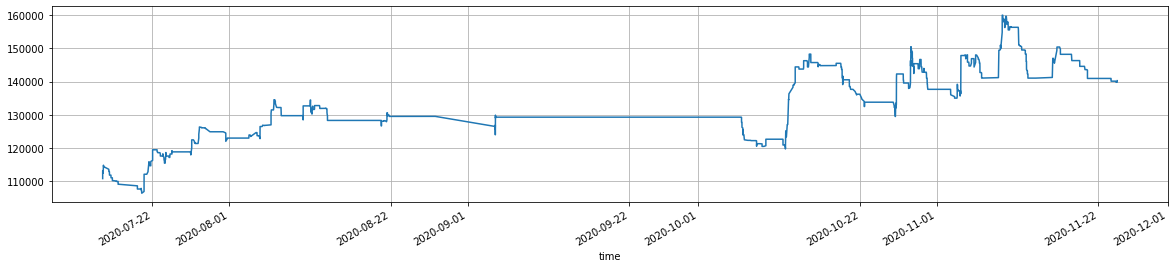

In [10]:
df.cash.plot(figsize=(20,4), grid=True);

In [11]:
by_contract = pd.pivot_table(df, values='realizedPNL', index=df.index, columns=['contract'])
by_contract['total'] = by_contract.sum(axis=1)

In [12]:
# number of trades
trades = df.groupby('contract').action.count()
trades, trades.sum()

(contract
 ES     94
 GC    192
 NQ    556
 YM    121
 Name: action, dtype: int64,
 963)

In [13]:
# trades per day
days = len(by_contract.resample('B').count().index)
trades/days, trades.sum()/days

(contract
 ES    0.989474
 GC    2.021053
 NQ    5.852632
 YM    1.273684
 Name: action, dtype: float64,
 10.136842105263158)

In [14]:
# commission paid
df.groupby('contract').commission.sum()

contract
ES     247.41
GC     510.88
NQ    1572.17
YM     335.90
Name: commission, dtype: float64

In [15]:
df.commission.sum()

2666.3600000000006

In [16]:
# per trade stats (pro rated per macro contract)
exits = df[df.realizedPNL!=0]
dfs = {}
for contract in exits.contract.unique():
    dfs[contract] = exits[exits.contract == contract]
dfs['total'] = exits
results = pd.DataFrame(columns=['success_rate', 'average_PNL', 'average_gain', 'average_loss', 
                                'win_ratio', 'EV/contract', 'number_of_contracts'])
for c, d in dfs.items():
    row = pd.Series()
    row['success_rate'] = round((d[d.realizedPNL > 0]).realizedPNL.count() / d.realizedPNL.count(), 2)
    d['pnl_per_contract'] = d.realizedPNL / d.amount
    row['average_PNL'] = round(d['pnl_per_contract'].mean(), 2)
    row['average_gain'] = round((d[d.realizedPNL > 0])['pnl_per_contract'].mean(), 2)
    row['average_loss'] = round((d[d.realizedPNL < 0])['pnl_per_contract'].mean(), 2)
    row['win_ratio'] = round(abs(row['average_gain'] / row['average_loss']), 2)
    row['EV/contract'] = round((row['average_gain'] * row['success_rate']) + (
        row['average_loss'] * (1 - row['success_rate'])), 2)
    row['number_of_contracts'] = d.amount.sum()
    results.loc[c] = row
results

,success_rate,average_PNL,average_gain,average_loss,win_ratio,EV/contract,number_of_contracts
YM,0.39,154.59,1445.01,-660.42,2.19,160.70,65.8
NQ,0.37,26.98,1057.04,-583.87,1.81,23.27,300.5
ES,0.33,237.24,2070.08,-679.18,3.05,228.08,38.3
GC,0.34,100.96,1420.58,-569.66,2.49,107.02,79.0
total,0.36,78.10,1265.05,-600.15,2.11,71.32,483.6


In [17]:
daily = by_contract.resample('B').sum()
daily = daily /  (allocs * cash)
#daily[['CL', 'ES', 'GC', 'NQ']].plot(figsize=(20,8), grid=True);

In [18]:
# instrument correlations
log_returns = np.log(daily + 1)
log_returns.corr()

,ES,GC,NQ,YM,total
ES,1.000000,0.021350,0.137867,0.291259,0.439746
GC,0.021350,1.000000,-0.057310,0.018047,0.243669
NQ,0.137867,-0.057310,1.000000,0.310401,0.844432
YM,0.291259,0.018047,0.310401,1.000000,0.639258
total,0.439746,0.243669,0.844432,0.639258,1.000000


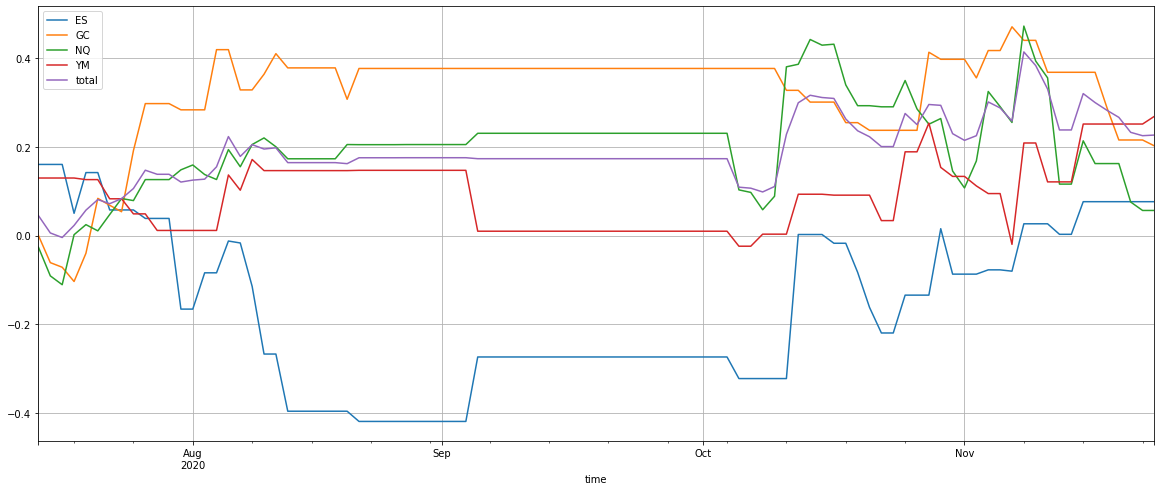

In [19]:
log_returns.cumsum().plot(figsize=(20,8), grid=True);

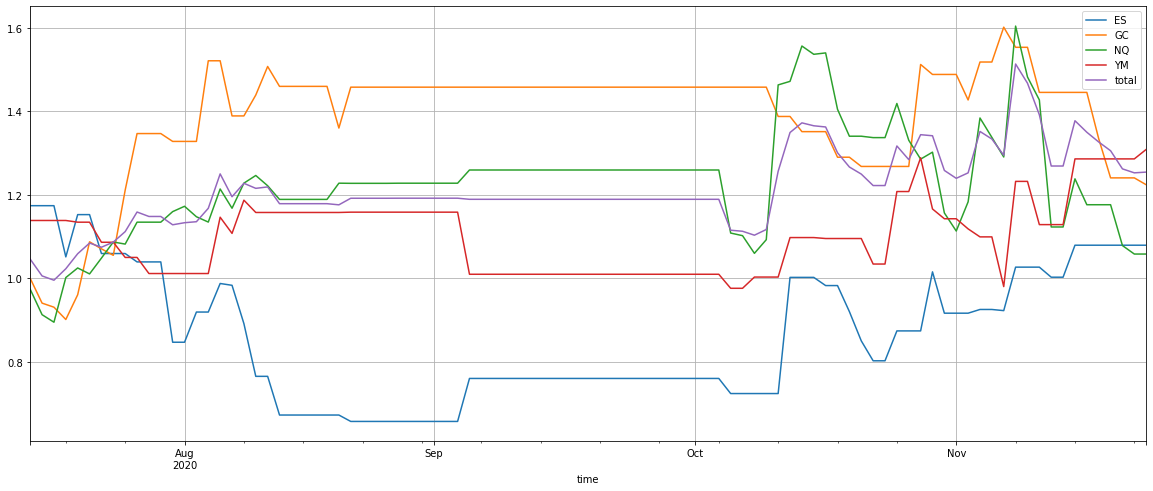

In [20]:
returns = daily.copy()
returns_index = (returns + 1).cumprod()
returns_index.plot(figsize=(20,8), grid=True);

In [21]:
stats = pd.DataFrame()
for col in daily.columns:
    stats[col] = perf_stats(daily[col])
stats

,ES,GC,NQ,YM,total
Annual return,0.224381,0.709444,0.161776,1.040956,0.824015
Cumulative returns,0.079303,0.224003,0.058157,0.308586,0.254306
Annual volatility,1.032643,0.678499,0.999272,0.775416,0.558715
Sharpe ratio,0.671072,1.109826,0.615373,1.282078,1.343364
Calmar ratio,0.510063,3.011671,0.475515,4.350601,4.786232
Stability,0.020431,0.131954,0.214208,0.058072,0.583792
Max drawdown,-0.439909,-0.235565,-0.340212,-0.239267,-0.172164
Omega ratio,1.225470,1.361439,1.171899,1.506593,1.366375
Sortino ratio,1.220374,2.242841,1.100491,2.587088,2.588966
Skew,2.167275,1.931586,1.891232,2.110427,1.647955


In [22]:
# monthly returns in percent
monthly_log_returns = log_returns.resample('M').sum()
monthly_returns = np.exp(monthly_log_returns)-1
round(monthly_returns, 4) * 100

,ES,GC,NQ,YM,total
time,,,,,
2020-07-31,-15.29,32.77,15.97,1.15,12.82
2020-08-31,-22.38,9.78,5.87,14.52,5.64
2020-09-30,15.65,0.00,2.57,-12.83,-0.22
2020-10-31,20.54,2.09,-8.16,13.16,5.81
2020-11-30,17.75,-17.74,-8.51,14.52,-0.31


In [23]:
# total returns by contract in percent
round(np.exp(monthly_log_returns.sum())-1, 2)* 100

ES        8.0
GC       22.0
NQ        6.0
YM       31.0
total    25.0
dtype: float64

In [24]:
df.sort_values('realizedPNL', ascending=False)[['contract', 'action', 'price', 'realizedPNL']]

,contract,action,price,realizedPNL
time,,,,
2020-11-04 03:14:38.840,NQ,SELL,11651.500000,11506.6
2020-11-09 01:36:53.379,NQ,SELL,12311.000000,8236.6
2020-11-16 01:46:56.858,NQ,SELL,12030.000000,5747.4
2020-07-20 22:44:06.883,NQ,SELL,10934.000000,5180.8
2020-10-12 08:41:25.532,NQ,SELL,11849.250000,5112.4
...,...,...,...,...
2020-10-28 20:12:43.602,NQ,BUY,11168.583333,-2327.6
2020-07-31 13:39:29.153,ES,SELL,3245.250000,-2408.4
2020-11-20 14:00:34.667,NQ,SELL,11976.416667,-2492.6


In [25]:
daily.sort_values('total', ascending=False)

,ES,GC,NQ,YM,total
time,,,,,
2020-11-09,0.112801,-0.030102,0.242791,0.256893,0.168667
2020-10-12,0.000000,-0.048118,0.339078,0.000000,0.124805
2020-11-16,0.076374,0.000000,0.102596,0.139371,0.085428
2020-11-04,0.009712,0.063649,0.169632,-0.017112,0.079110
2020-10-26,0.089103,0.000000,0.061112,0.167803,0.077534
...,...,...,...,...,...
2020-10-19,0.000000,-0.045312,-0.087685,0.000000,-0.045269
2020-11-11,0.000000,-0.069488,-0.037141,-0.083980,-0.051486
2020-10-30,-0.097425,0.000000,-0.111733,-0.020080,-0.061892
